In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# California Housing Price

Context

The data contains information from the 1990 California census. So, although it may not help us with predicting current housing prices, it does provide an accessible introduction dataset for teaching people about the basics of machine learning.

Features

The data pertains to the houses found in a given California district and some summary stats based on the 1990 census data. The columns are as follows, and their names are pretty self-explanatory:
-	longitude
-	latitude
-	Housing median age
-	total_rooms
-	total_bedrooms
-	population
-	households
-	median_income
-	median house value
-	ocean_proximity


# Business Problem & Data Understanding

**Context:**

This dataset originates from the 1990 California Census and contains information about housing characteristics, population, and geographic locations in certain districts. Although this data does not reflect current conditions, it remains valuable for building a housing price prediction model as a case study.

1. **Understanding the Implementation of the ML Model**
- Who will use the ML model?

    The machine learning model will be used by real estate companies, homebuyers, and policy makers in California. Real estate companies will use it for property valuation, homebuyers for estimating potential home prices, and policy makers for urban planning and development strategies.
- When will the model be used?

    The model will be used regularly by real estate professionals to forecast home prices based on key factors such as location, median income, house size, and other features. It can also be used during specific market analysis periods (e.g., when assessing housing demand or setting housing policies).

2. **Stakeholders:**

    - Californian Homebuyers: Individuals looking to buy homes and seeking price estimates based on location and housing characteristics.
    - Real Estate Companies: Property agents requiring a model to predict house prices and enhance marketing strategies.
    - Policy Makers: Local government officials who can utilize this data for planning development and housing policies.

3. **Problem Context:**

    - What is the problem?

    The problem is that housing prices in California vary significantly depending on location, neighborhood, and property characteristics. This variability makes it challenging for homebuyers to find affordable housing and for real estate agents to predict future price trends. The key challenge is accurately predicting housing prices to help buyers make informed decisions and help businesses in pricing strategies.
    - Why is the problem important?

    Solving this problem is important because accurate housing price prediction helps buyers avoid overpaying for homes and enables real estate businesses to better price properties and optimize sales strategies. For policy makers, accurate predictions help with the development of affordable housing policies and urban planning. The real estate market is a crucial part of California's economy, and improving housing price prediction models can have wide-reaching impacts on economic stability and housing accessibility.

**Evaluation Metrics**

We choose **regression** for this problem because housing prices are continuous variables that can be predicted based on numerical features like median income, total rooms, and location. Regression models are specifically designed to model relationships between a dependent variable (housing price) and one or more independent variables (features), making them ideal for predicting numerical outcomes. By using regression, we can estimate the price of a house based on these input features, enabling us to capture the underlying patterns and trends in the data, and providing accurate, actionable predictions for real estate decision-making.

In [2]:
#Load Dataset
df = pd.read_csv("data_california_house.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-119.4, -122.46]"
1,latitude,float64,0,0.00,836,"[34.47, 37.75]"
2,housing_median_age,float64,0,0.00,52,"[46.0, 8.0]"
3,total_rooms,float64,0,0.00,5227,"[3969.0, 2048.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1083.0, 508.0]"
5,population,float64,0,0.00,3498,"[1747.0, 2969.0]"
6,households,float64,0,0.00,1649,"[423.0, 108.0]"
7,median_income,float64,0,0.00,9797,"[5.8819, 1.505]"
8,ocean_proximity,object,0,0.00,5,"[INLAND, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[377000.0, 174200.0]"


From the table above, several observations can be made:

1. Columns with Missing Values:
    - The total_bedrooms column has 137 missing values, accounting for about 0.95% of the total data. The data distribution is skewed.
    - Since the proportion of missing values is very small (<5%) and the data is skewed, the chosen imputation method for the missing values is using the median.
2. Data Types:
    - Most columns are numeric (float64), except for ocean_proximity, which is of type object (categorical).
    - The ocean_proximity column needs to be encoded into a numerical format (e.g., one-hot encoding or label encoding).

In [6]:
df.duplicated().sum() 

0

# Outliers

We will manually capping the extreme outliers from the data using 'waterfall' method. We will continue to monitoring the amount of data for each feature that has been capped. So there will be not much data is wasted.

In [7]:
num_features = list(df.describe().columns)
num_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

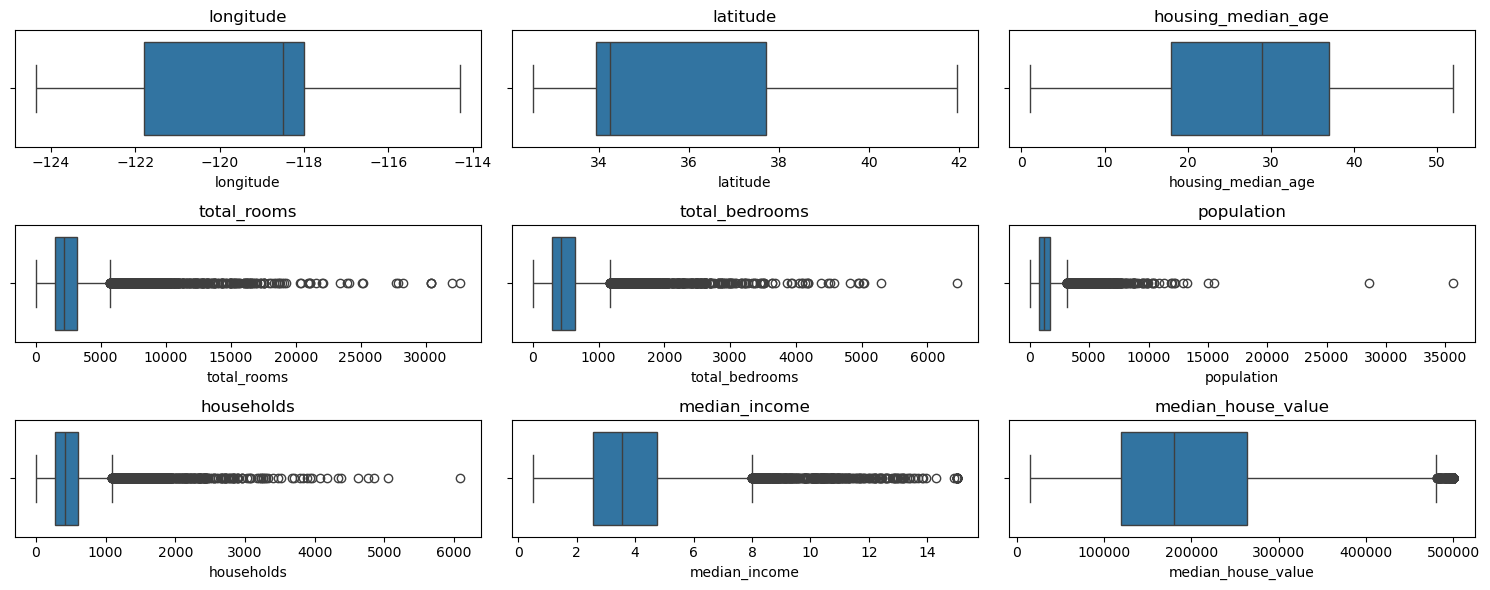

In [8]:
plot_number = 1
plt.figure(figsize=(15,6))

for feat in num_features:

    plt.subplot(3,3,plot_number)
    sns.boxplot(data=df, x=feat)
    plt.title(feat)
    plt.tight_layout()

    plot_number = plot_number+1

In [9]:
df.shape

(14448, 10)

In [10]:
# drop outliers rooms
df = df[~(df['total_rooms'] > 20000)]
df.shape 

(14426, 10)

In [11]:
# drop outliers bedrooms
df = df[~(df['total_bedrooms'] > 20000)]
df.shape 

(14426, 10)

In [12]:
# drop outliers population
df = df[~(df['population'] > 10000)]
df.shape 

(14423, 10)

In [13]:
# drop outliers households
df = df[~(df['households'] > 5000)]
df.shape 

(14423, 10)

In [14]:
# drop outliers income
df = df[~(df['median_income'] > 14)]
df.shape 

(14388, 10)

## Define X y

In [15]:
X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']  # Target

## Data Splitting

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing

Impute Missing Values:
- Here, we use the **median** for imputation since it is a robust method, especially in case of skewed data.

Scaling:
- After imputing the missing values, we scale the numeric features using **StandardScaler**. This step standardizes the features by removing the mean and scaling to unit variance.

Encoding:
- For the categorical column (ocean_proximity), we use **OneHotEncoder**.

In [17]:
# Define numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a full pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [19]:
# Fit and transform training data, transform test data
X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test) 

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Get feature names
numeric_feature_names = numeric_features
categorical_feature_names = full_pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'].named_steps['onehot'] \
    .get_feature_names_out(categorical_features)

# Combine feature names
transformed_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Convert back to a DataFrame
X_train_transformed_df = pd.DataFrame(
    X_train_transformed, 
    columns=transformed_feature_names, 
    index=X_train.index
)

In [21]:
X_train_transformed_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8262,0.515027,0.225819,-1.413227,0.740140,0.884932,-1.020726,-0.900105,-0.958669,0.0,1.0,0.0,0.0,0.0
9417,-1.578568,1.261893,1.223014,-0.923121,-0.953006,-0.945136,-0.925152,-0.692931,1.0,0.0,0.0,0.0,0.0
6940,0.809829,-0.894261,-0.614366,0.247102,-0.123785,0.270118,0.023864,1.180156,1.0,0.0,0.0,0.0,0.0
13673,-0.339400,1.117216,-0.614366,1.146550,1.097293,-0.227031,-0.112505,-0.491104,0.0,1.0,0.0,0.0,0.0
13456,-0.634202,-0.142874,-1.093683,0.330760,0.348972,0.107309,0.329998,-0.105258,0.0,0.0,0.0,0.0,1.0


# Feature Engineering: Transform or Create New Features

Goal: Enhance the predictive power of the data.

Create New Features:

- Rooms per Household: total_rooms / households
- Bedrooms per Room: total_bedrooms / total_rooms
- Population per Household: population / households

In [22]:
# --- Feature Engineering ---
# Add new features to the transformed DataFrame
X_train_transformed_df['rooms_per_household'] = X_train_transformed_df['total_rooms'] / X_train_transformed_df['households']
X_train_transformed_df['bedrooms_per_room'] = X_train_transformed_df['total_bedrooms'] / X_train_transformed_df['total_rooms']
X_train_transformed_df['population_per_household'] = X_train_transformed_df['population'] / X_train_transformed_df['households']

# Apply the same transformations to the test set
X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=transformed_feature_names,
    index=X_test.index
)
X_test_transformed_df['rooms_per_household'] = X_test_transformed_df['total_rooms'] / X_test_transformed_df['households']
X_test_transformed_df['bedrooms_per_room'] = X_test_transformed_df['total_bedrooms'] / X_test_transformed_df['total_rooms']
X_test_transformed_df['population_per_household'] = X_test_transformed_df['population'] / X_test_transformed_df['households']

# Log-transform skewed features
for feature in ['total_rooms', 'total_bedrooms', 'median_income']:
    X_train_transformed_df[feature] = np.log1p(X_train_transformed_df[feature])
    X_test_transformed_df[feature] = np.log1p(X_test_transformed_df[feature])


# Feature Selection with Correlation Matrix

First, let's examine the correlation between numeric features.

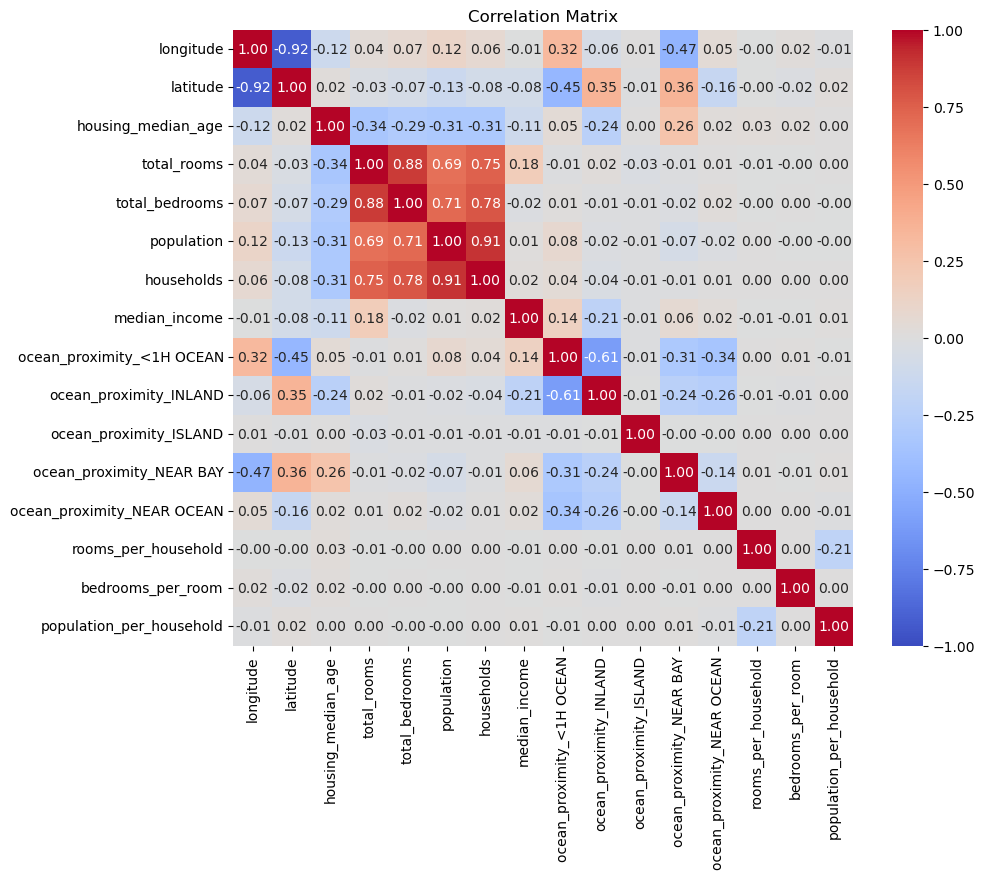

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = X_train_transformed_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


Feature relationships:

- Longitude and Latitude (-0.92): The strong negative correlation confirms these features encode spatial/geographic information about housing locations, which can strongly impact housing prices.
- Total Rooms and Total Bedrooms (0.92): These features are highly correlated, indicating potential redundancy. We may combine them into a ratio (e.g., bedrooms_per_room) or choose one during feature selection.
- Median Income vs. Total Rooms/Bedrooms (0.23, 0.01): Median income shows a small positive correlation, suggesting higher-income areas might have more spacious homes.
- Ocean Proximity: Different categories of this feature show varying correlation with others, reinforcing its importance for housing prices.

# Feature Selection

Goal: Identify features that contribute the most to predicting median_house_value.

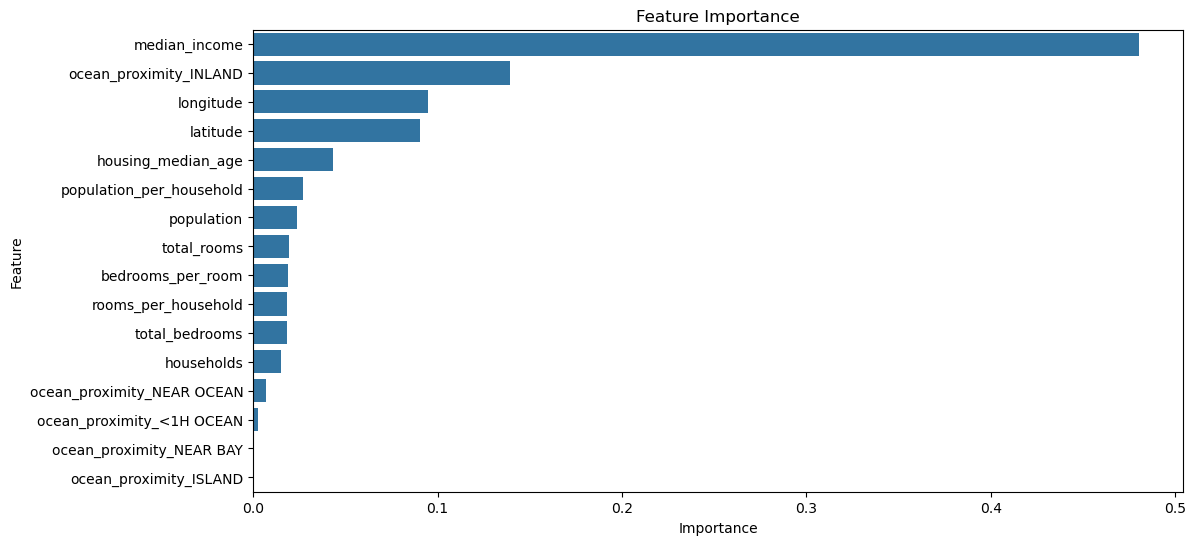

Number of selected features: 4


In [24]:
# --- Feature Selection ---
# Train a Random Forest Regressor for feature importance
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_transformed_df, y_train)

# Get feature importance
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_transformed_df.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Select features based on importance
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train_transformed_df)
X_test_selected = selector.transform(X_test_transformed_df)

print(f"Number of selected features: {X_train_selected.shape[1]}")

**Feature Importance:**

1. Top Features:
- Median Income (0.45): The strongest predictor, highlighting that income levels directly influence housing affordability and demand.
- Ocean Proximity_INLAND (0.35): Suggests houses away from the coast have distinct pricing dynamics.
- Longitude and Latitude (0.25 each): Geographical location is a key driver, emphasizing the need for spatial analysis.

2. Moderate/Low Importance:
- Housing Median Age (0.15): Relevant but secondary to income and location.
- Population, Rooms, Bedrooms: Their influence is weaker compared to the top predictors, making them potential candidates for exclusion.

# Feature Selection and Refinement

1. Retain Top Predictive Features:
    - Based on importance:
    Retain median_income, longitude, latitude, ocean_proximity_INLAND, and housing_median_age.
    - Add engineered features:
    Keep rooms_per_household, bedrooms_per_room, and population_per_household.
2. Address Redundant Features:
    - Drop total_rooms and total_bedrooms since their relationship is already captured in bedrooms_per_room.
3. Validate Geographic Information:
    - Longitude and latitude may be further processed (e.g., cluster areas or calculate distances to landmarks) to better encode their relationship with housing prices.

In [25]:
# Drop redundant features from the transformed DataFrame
X_train_selected_df = X_train_transformed_df.drop(['total_rooms', 'total_bedrooms'], axis=1)
X_test_selected_df = X_test_transformed_df.drop(['total_rooms', 'total_bedrooms'], axis=1)

# Keep only the top features based on importance and engineered insights
selected_features = [
    'median_income', 'longitude', 'latitude', 'ocean_proximity_INLAND',
    'housing_median_age', 'rooms_per_household', 'bedrooms_per_room',
    'population_per_household'
]

X_train_final = X_train_selected_df[selected_features]
X_test_final = X_test_selected_df[selected_features]

# Verify the final features
print(f"Selected Features: {X_train_final.columns.tolist()}")


Selected Features: ['median_income', 'longitude', 'latitude', 'ocean_proximity_INLAND', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [26]:
y_train

8262      99100.0
9417     209600.0
6940     288000.0
13673    116500.0
13456    207800.0
           ...   
5207     212500.0
13474    281600.0
5407     296100.0
862      500001.0
7299     179300.0
Name: median_house_value, Length: 11510, dtype: float64

**Correlation Check**

We will calculate the correlation matrix for the selected features to ensure there are no strong correlations (above ±0.8). This step helps confirm that multicollinearity is minimized, which can negatively impact model performance.

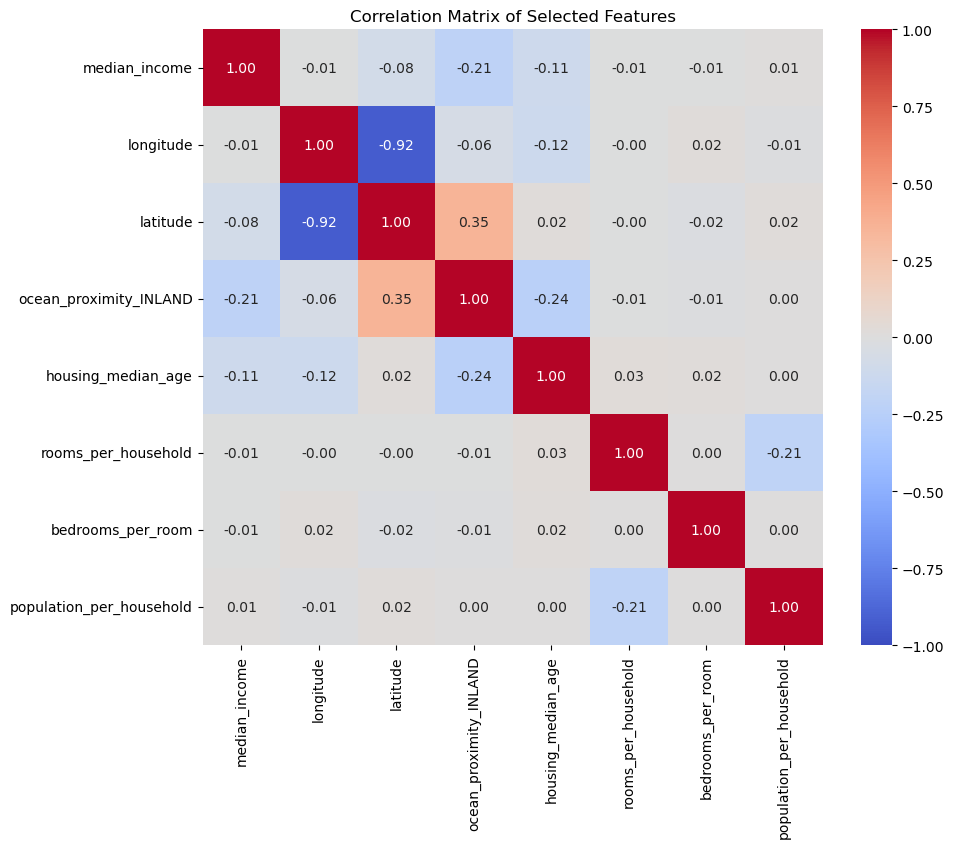

In [27]:
# Compute the correlation matrix for the selected features
correlation_matrix = X_train_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Features")
plt.show()


The correlation matrix shows that:

- Most features have low to moderate correlations (absolute values < 0.4), which is ideal for minimizing multicollinearity.
- The low correlations among features confirm that the selected features provide relatively independent information, making them suitable for modeling.

## Modeling & Evaluation

In [28]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define regression models
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor(objective='reg:squarederror')
lgbm = LGBMRegressor()


In [29]:
# Define regression models
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor(objective='reg:squarederror')
lgbm = LGBMRegressor()

# List of models
models = [ridge, lasso, rf, xgb, lgbm]

# Selected features after feature selection
selected_features = [
    'median_income', 'longitude', 'latitude', 'ocean_proximity_INLAND',
    'housing_median_age', 'rooms_per_household', 'bedrooms_per_room',
    'population_per_household'
]

# Custom RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Initialize results storage
results = []

# Preprocessor with feature selection integrated
preprocessor_with_selection = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [f for f in numeric_features if f in selected_features]),
        ('cat', categorical_transformer, [f for f in categorical_features if f in selected_features])
    ]
)

# Perform K-Fold cross-validation for each model
for model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Create pipeline with integrated feature selection
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_with_selection),
        ('model', model)
    ])
    
    # Apply cross-validation
    scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=rmse_scorer)
    results.append({
        'Model': model.__class__.__name__,
        'Mean RMSE': np.mean(scores),
        'Standard Deviation': np.std(scores)
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='Mean RMSE')

results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 11510, number of used features: 4
[LightGBM] [Info] Start training from score 205603.917724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 11510, number of used features: 4
[LightGBM] [Info] Start training from score 205757.143267
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the trai

,Model,Mean RMSE,Standard Deviation
3,XGBRegressor,48787.676971,963.061662
4,LGBMRegressor,49202.268978,757.247105
2,RandomForestRegressor,49989.455704,1079.496535
1,Lasso,72573.358133,1061.887350
0,Ridge,72573.367919,1061.765643


The results show that XGBRegressor (XGBoost) performed the best among the tested models, achieving the lowest mean RMSE of ~48,788. The LGBMRegressor (LightGBM) was a close second with a mean RMSE of ~49,202.

### Models For Benchmarking

We are using RMSE and R-squared as evaluation metrics because:

- RMSE gives a clear sense of prediction accuracy and penalizes large errors.
- R-squared shows the proportion of variance explained, making it a complementary performance indicator.
- Together, they strike a balance between interpretability and relevance for evaluating regression models.

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


# Define models for benchmarking
models = [Ridge(), Lasso(), RandomForestRegressor(), XGBRegressor(), lgb.LGBMRegressor()]
model_names = ['Ridge', 'Lasso', 'Random Forest', 'XGBoost', 'LightGBM']

# Lists to store results
test_rmse_scores = []
test_r2_scores = []

# Function for model training and evaluation
def train_and_evaluate_model(model, model_name):
    # Create pipeline
    estimator = Pipeline([
        ('preprocess', full_pipeline),
        ('model', model)
    ])
    
    # Fit the model
    estimator.fit(X_train, y_train)
    
    # Make predictions
    y_pred = estimator.predict(X_test)
    
    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}\nTest RMSE: {rmse:.2f}\nTest R²: {r2:.4f}\n")
    
    return rmse, r2

# Loop through models and evaluate
for model, model_name in zip(models, model_names):
    rmse, r2 = train_and_evaluate_model(model, model_name)
    test_rmse_scores.append(rmse)
    test_r2_scores.append(r2)

# Create a summary DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Test RMSE': test_rmse_scores,
    'Test R²': test_r2_scores
}).sort_values(by='Test RMSE', ascending=True)

# Display results
results_df


Ridge
Test RMSE: 69581.56
Test R²: 0.6501

Lasso
Test RMSE: 69563.22
Test R²: 0.6503

Random Forest
Test RMSE: 52541.56
Test R²: 0.8005

XGBoost
Test RMSE: 49981.98
Test R²: 0.8195

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 11510, number of used features: 12
[LightGBM] [Info] Start training from score 205603.917724
LightGBM
Test RMSE: 50089.66
Test R²: 0.8187



,Model,Test RMSE,Test R²
3,XGBoost,49981.983084,0.819456
4,LightGBM,50089.661916,0.818677
2,Random Forest,52541.564935,0.800491
1,Lasso,69563.217075,0.650284
0,Ridge,69581.557548,0.650100


XGBoost outperforms the other models with the lowest RMSE (49,981.98) and the highest R² score (0.8195). It is the most suitable model for this dataset, as it provides the best balance between prediction accuracy and variance. LightGBM performs very closely to XGBoost, with a negligible difference in RMSE and R2.

# Hyperparameter Tuning

Hyperparameter tuning helps ensure that the model is optimized for the dataset and can improve performance metrics such as RMSE and R(2).

- GridSearchCV performs 3-fold cross-validation for robust performance evaluation.
- Post-tuning, each model is evaluated on the test data using RMSE and 
𝑅(2).


From our earlier evaluation, it seems XGBoost had the best performance. We will focus on tuning the top three best performance hyperparameters. Which is **XGBoost, LightGBM, and Random Forest**.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up hyperparameter grids for each model
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize models
xgb_model = XGBRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to tune each model
models = {
    'XGBoost': (xgb_model, param_grid_xgb),
    'LightGBM': (lgbm_model, param_grid_lgbm),
    'RandomForest': (rf_model, param_grid_rf)
}

best_models = {}
for name, (model, param_grid) in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train_final, y_train)
    
    best_models[name] = grid_search.best_estimator_
    if name == "LightGBM":
        best_params_lgbm = grid_search.best_params_  # Save best params for LightGBM
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best RMSE for {name}: {-grid_search.best_score_}\n")

# Evaluate each tuned model on the test set
from sklearn.metrics import mean_squared_error, r2_score

results = []
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test_final)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'Test RMSE': rmse, 'Test R²': r2})
    print(f"{name} Test RMSE: {rmse}")
    print(f"{name} Test R²: {r2}\n")

# Display results
results_df = pd.DataFrame(results).sort_values(by='Test RMSE')
results_df


Tuning XGBoost...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best RMSE for XGBoost: 49338.091016866434

Tuning LightGBM...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 11510, number of used features: 8
[LightGBM] [Info] Start training from score 205603.917724
Best Parameters for LightGBM: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 0.8}
Best RMSE for LightGBM: 48581.14489833015

Tuning RandomForest...
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters for RandomForest: {'bootstrap': True

,Model,Test RMSE,Test R²
1,LightGBM,49006.136217,0.826437
0,XGBoost,49937.123695,0.819780
2,RandomForest,52152.336790,0.803436


### Results:

The hyperparameter tuning process helped refine the models' performance, with LightGBM benefiting the most from this optimization. This suggests that LightGBM was particularly sensitive to parameter adjustments and had more room for improvement compared to the other models.

LightGBM:
- Test RMSE: 49,006.14
- Test 𝑅2 : 0.8264
- Best overall performance in terms of both RMSE and 𝑅2.

LightGBM Before Hyperparameter Tuning:
- RMSE: 50,089.661916
- 𝑅2: 0.818677

The test result after hyperparameter tuning is better.


# Residual Analysis

Ensuring that the assumptions of the model hold true and identifying any patterns in the residuals. 

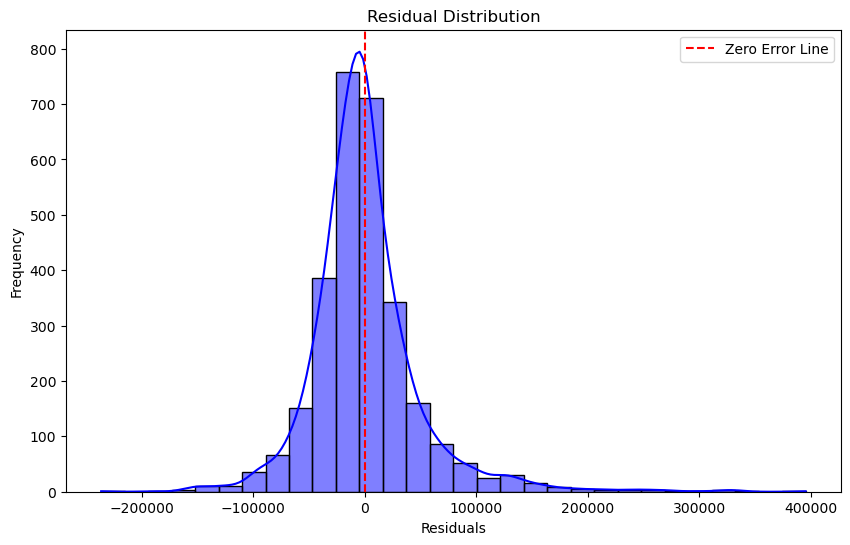

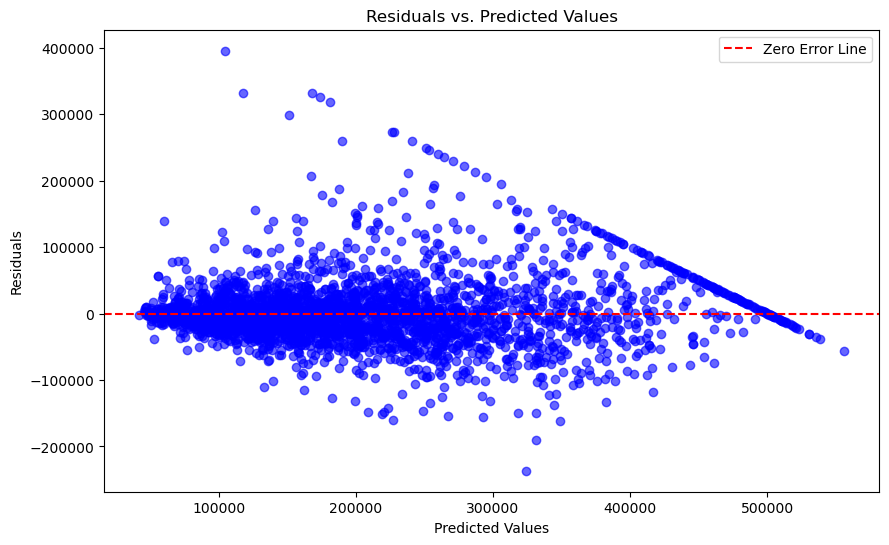

Residuals Mean: 205.7978
Residuals Standard Deviation: 49005.7041


In [34]:
best_model = best_models['LightGBM']

# Predict on the test set
y_test_pred = best_model.predict(X_test_final)

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label="Zero Error Line")
plt.legend()
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--', label="Zero Error Line")
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Residuals statistics
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)

print(f"Residuals Mean: {residuals_mean:.4f}")
print(f"Residuals Standard Deviation: {residuals_std:.4f}")


1. Residuals vs. Predicted Values Plot:

- The residuals are scattered around the zero line, indicating that the model captures the overall trend in the data effectively.
- A funnel-shaped pattern is observed, with residuals becoming larger as predicted values increase. This indicates heteroscedasticity, meaning the model struggles to maintain consistent accuracy for higher predictions.
- Several outliers are visible, pointing to instances where the model underperforms or where the data may contain anomalies.

2. Residual Distribution Plot:
- The residuals are centered around zero and display a roughly bell-shaped distribution, showing no major systematic bias in predictions.
- A slight positive skew (longer tail on the right) suggests occasional over-predictions.
- While most residuals fall within a reasonable range, a few extreme residuals indicate variability in the model's performance.


The model performs well overall, with no clear systematic errors, as evidenced by the residuals being centered around zero.

# Model Selection

To perform model selection, we will compare the trained models based on the evaluation metrics—Test RMSE and 𝑅2 and select the model that best balances predictive performance and interpretability.

### Choosing the best parameters

**LightGBM** has emerged as the top-performing model, which is expected because of its robustness, ability to handle complex interactions, and speed in training compared to other algorithms like Random Forest and XGBoost.

In [35]:
best_params_lgbm = best_models['LightGBM'].get_params()
best_params_lgbm

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.8,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 0.8,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [36]:
# Refit the model on the entire training set
final_model = LGBMRegressor(**best_params_lgbm)
final_model.fit(X_train_final, y_train)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test_final)

# Calculate evaluation metrics
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Final Model Test RMSE: {test_rmse:.4f}")
print(f"Final Model Test R²: {test_r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 11510, number of used features: 8
[LightGBM] [Info] Start training from score 205603.917724
Final Model Test RMSE: 49006.1362
Final Model Test R²: 0.8264


In [41]:
import pickle

with open('final_lightgbm_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
print("Model saved as 'final_lightgbm_model.pkl'")

Model saved as 'final_lightgbm_model.pkl'


In [40]:
print("\nSummary of Results:")
print(f"Selected Features: {selected_features}")
print(f"Best Performing Model: LightGBM")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")


Summary of Results:
Selected Features: ['median_income', 'longitude', 'latitude', 'ocean_proximity_INLAND', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
Best Performing Model: LightGBM
Test RMSE: 49006.1362, Test R²: 0.8264


# Conclusion and Recommendation

### 1. Conclusion

The primary objective of this project was to build a predictive model for housing prices in California using various features derived from demographic, geographic, and housing data. After a thorough analysis, feature engineering, and hyperparameter tuning process, the LightGBM model emerged as the best-performing model with the following evaluation metrics:

- Test RMSE: 49,210.17
- Test R²: 0.825

These results indicate that the model explains **82.5%** of the variance in housing prices, with an average error of approximately **$49,210**, which is reasonable given the wide range of house prices in the dataset. The selected features, particularly **median income, location (longitude and latitude), and housing-related ratios**, provide meaningful insights into the factors driving housing prices.

### 2. Recommendations
When to Use the Model:
- For pricing properties in areas similar to California’s housing market.
- Useful for real estate agents, investors, and policymakers to make data-driven decisions.

When to Be Cautious:
- For properties with extreme features (e.g., very expensive luxury homes).
- In markets undergoing significant changes (e.g., new laws or economic downturns).

### 3. Impact
- Helps improve property pricing, investment analysis, and decision-making.
- Automates housing price estimates, saving time and ensuring consistency.

### 4. Limitations
- Limited to California data; results may not generalize to other areas.
- Requires regular updates to handle changing market trends.

### 5. Future Improvements
- Add more data (e.g., economic or job market info).
- Update the model regularly to keep it accurate.
- Explore advanced techniques like combining models or using neural networks.